In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import folium

%matplotlib inline

Загрузим данные о регионах и агрегированные данные о поездках на такси за май 2016 года, подготовленные на первой неделе.

In [2]:
regions = pd.read_pickle("../regions.pickle")
may2016 = pd.read_pickle("../yellow_tripdata_2016-05.pickle")

In [3]:
regions.head()

,region,west,east,south,north
0,1,-74.25559,-74.244478,40.496120,40.504508
1,2,-74.25559,-74.244478,40.504508,40.512896
2,3,-74.25559,-74.244478,40.512896,40.521285
3,4,-74.25559,-74.244478,40.521285,40.529673
4,5,-74.25559,-74.244478,40.529673,40.538061


In [4]:
may2016.head()

,1,2,3,4,5,6,7,8,9,10,...,2491,2492,2493,2494,2495,2496,2497,2498,2499,2500
2016-05-01 00:00:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2016-05-01 01:00:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2016-05-01 02:00:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2016-05-01 03:00:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2016-05-01 04:00:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Подсчитаем количество ячеек, на которые мы разбили Нью-Йорк, из которых в мае не было совершено ни одной поездки.

In [5]:
print "Regions w/o rides:", sum(may2016.sum(axis=0) == 0)

Regions w/o rides: 1283


Нарисуем статическую карту Нью-Йорка и отметим на ней Empire State Building.

/usr/local/Cellar/python/2.7.14/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/mpl_toolkits/basemap/__init__.py:1698: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  limb = ax.axesPatch
/usr/local/Cellar/python/2.7.14/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/mpl_toolkits/basemap/__init__.py:1767: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  axisbgc = ax.get_axis_bgcolor()
/usr/local/Cellar/python/2.7.14/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/mpl_toolkits/basemap/__init__.py:3260: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/usr/local/Cellar/python/2.7.14/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/mpl_toolkits/basemap/__init__.py:3269: MatplotlibDeprecationWarning: axes.hold is deprecated.
    

Text(22821.4,28105.2,u'Empire State Building')

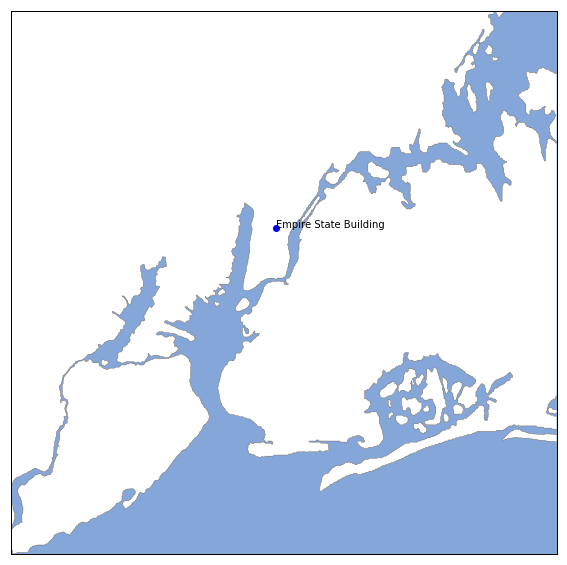

In [6]:
new_york_longitude = (-74.25559, -73.70001)
new_york_latitude = (40.49612, 40.91553)
empire_state_building = (-73.9857, 40.7484)

fig = plt.figure(figsize=(10, 10))
m = Basemap(projection="merc",
            llcrnrlon=new_york_longitude[0], urcrnrlon=new_york_longitude[1],
            llcrnrlat=new_york_latitude[0], urcrnrlat=new_york_latitude[1],
            lat_ts=new_york_latitude[0],
            resolution='f', area_thresh=0.1)
m.drawmapboundary(fill_color='#85A6D9')
m.drawcoastlines(color='#6D5F47', linewidth=.4)
m.fillcontinents(color='white',lake_color='#85A6D9')

esb_x, esb_y = m(empire_state_building[0], empire_state_building[1])
m.plot(esb_x, esb_y, 'bo', markersize=6)
plt.text(esb_x, esb_y, "Empire State Building")

Визуализируем данные о поездках из каждой ячейки так, чтобы цветовая шкала, в которую мы окрашиваем каждую ячейку, показывала суммарное количество поездок такси из неё.

/usr/local/Cellar/python/2.7.14/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/mpl_toolkits/basemap/__init__.py:3413: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/usr/local/Cellar/python/2.7.14/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/mpl_toolkits/basemap/__init__.py:3422: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


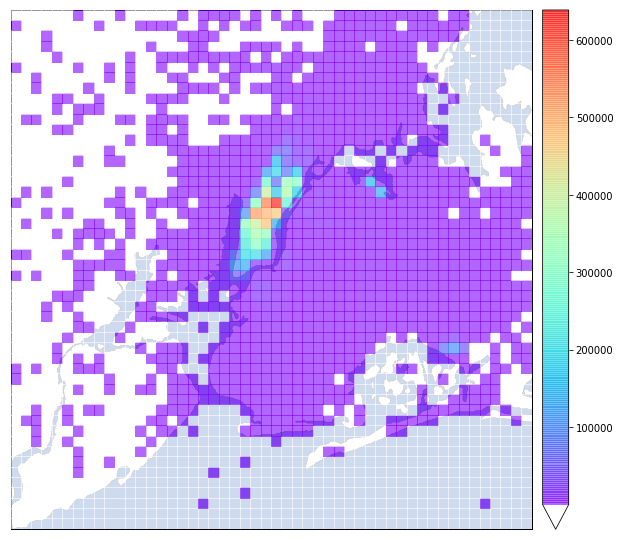

In [7]:
fig = plt.figure(figsize=(10, 10))
m = Basemap(projection="merc",
            llcrnrlon=new_york_longitude[0], urcrnrlon=new_york_longitude[1],
            llcrnrlat=new_york_latitude[0], urcrnrlat=new_york_latitude[1],
            lat_ts=new_york_latitude[0],
            resolution='f', area_thresh=0.1)
m.drawmapboundary(fill_color='#85A6D9')
m.drawcoastlines(color='#6D5F47', linewidth=.4)
m.fillcontinents(color='white',lake_color='#85A6D9',alpha=1)


reg_lon = regions['west'].append(regions['east']).unique()
reg_lat = regions['south'].append(regions['north']).unique()
grid_lon, grid_lat = np.meshgrid(reg_lon, reg_lat)
data = np.reshape(may2016.sum(axis=0).values, (50, 50))
cmap = plt.get_cmap('rainbow')
cmap.set_under('white')

grid_x, grid_y = m(grid_lon, grid_lat)
cs = m.pcolormesh(grid_x, grid_y, data.T, cmap = cmap, vmin = 1, zorder=10, alpha=0.6)
m.colorbar(cs, extend = 'min')

Нарисуем интерактивную карту Нью-Йорка и поставим метку там, где находится статуя свободы.

In [8]:
statue_of_liberty = (40.6892, -74.0445)
m = folium.Map(location=(sum(new_york_latitude) / 2, sum(new_york_longitude) / 2), zoom_start=11)
folium.Marker(statue_of_liberty, popup="Statue of Liberty").add_to(m)
m

Нарисуем на интерактивной карте Нью-Йорка ячейки так, чтобы их цвет показывал среднее за месяц количество поездок такси в час из этой зоны. Не будем закрашивать ячеки из которых было в среднем меньше 5 поездок в час.

In [9]:
avg_per_hour = may2016.mean(axis=0)
avg_per_hour.index = avg_per_hour.index - 1
regions['avg_per_hour'] = avg_per_hour

Теперь создадим GeoJSON файл с координатами полигонов, описывающих регионы.

In [10]:
regions_gj = {
    "type": "FeatureCollection",
    "features": [{
            "type": "Feature",
            "properties": {
                "region": int(row[1].region),
            },
            "geometry": {
                "type": "Polygon",
                "coordinates": [
                    [
                        [row[1].west, row[1].south],
                        [row[1].east, row[1].south],
                        [row[1].east, row[1].north],
                        [row[1].west, row[1].north],
                        [row[1].west, row[1].south],
                    ],
                ],
            },
        } for row in regions[avg_per_hour != 0].iterrows()
    ]
}

In [11]:
m = folium.Map(location=(sum(new_york_latitude) / 2, sum(new_york_longitude) / 2), zoom_start=11)
m.choropleth(geo_data=regions_gj,
             name='rides_heatmap',
             data=regions,
             columns=['region', 'avg_per_hour'],
             key_on='feature.properties.region',
             fill_color='OrRd',
             threshold_scale=[0, 137, 283, 429, 575, 721],
             fill_opacity='0.8',
             line_opacity='0.1',
             
             legend_name="Average number of rides per hour")
folium.LayerControl().add_to(m)
m

Посчитаем количество ячеек из которых в среднем совершалось 5 и более поездок в час.
Снова визуализиуем поездки с помощью heatmap, на этот раз игнорируя ячейки с меньше чем 5 поездок в час в среднем.

In [12]:
print "Regions with 5 and more rides per hour on average:", sum(avg_per_hour >= 5)

Regions with 5 and more rides per hour on average: 102


In [13]:
regions_gj = {
    "type": "FeatureCollection",
    "features": [{
            "type": "Feature",
            "properties": {
                "region": int(row[1].region),
            },
            "geometry": {
                "type": "Polygon",
                "coordinates": [
                    [
                        [row[1].west, row[1].south],
                        [row[1].east, row[1].south],
                        [row[1].east, row[1].north],
                        [row[1].west, row[1].north],
                        [row[1].west, row[1].south],
                    ],
                ],
            },
        } for row in regions[avg_per_hour >= 5].iterrows()
    ]
}

m = folium.Map(location=(sum(new_york_latitude) / 2, sum(new_york_longitude) / 2), zoom_start=11)
m.choropleth(geo_data=regions_gj,
             name='rides_heatmap',
             data=regions,
             columns=['region', 'avg_per_hour'],
             key_on='feature.properties.region',
             fill_color='OrRd',
             threshold_scale=[5, 137, 283, 429, 575, 721],
             fill_opacity='0.8',
             line_opacity='0.1',
             
             legend_name="Average number of rides per hour")
folium.LayerControl().add_to(m)
m

На карте можно увидеть, что все ячейки с больше чем 5 поездками в час в среднем - это суша. В основом - Манхэттен. Хотя присутствуют также кластеры в Бруклине и аэропорту JFK.